In [1]:
!pip install raphtory

                                              0.0/8.6 MB ? eta -:--:--
                                              0.0/8.6 MB ? eta -:--:--
                                              0.0/8.6 MB ? eta -:--:--
                                              0.0/8.6 MB 281.8 kB/s eta 0:00:31
     -                                        0.3/8.6 MB 1.5 MB/s eta 0:00:06
     ---                                      0.7/8.6 MB 3.3 MB/s eta 0:00:03
     ----                                     1.0/8.6 MB 4.4 MB/s eta 0:00:02
     ----                                     1.0/8.6 MB 4.4 MB/s eta 0:00:02
     ----                                     1.0/8.6 MB 4.4 MB/s eta 0:00:02
     ----                                     1.0/8.6 MB 4.4 MB/s eta 0:00:02
     -----                                    1.3/8.6 MB 2.8 MB/s eta 0:00:03
     ---------                                2.1/8.6 MB 4.2 MB/s eta 0:00:02
     ---------                                2.1/8.6 MB 4.2 MB/s eta 0:00:02
     

In [2]:
# Import necessary libraries
import pandas as pd

def preprocess_and_load_data(filepath):
    """
    Load and preprocess call graph data from a CSV file.
    
    This function performs several preprocessing steps on call graph data, including:
    1. Loading specific columns from the CSV file.
    2. Removing rows containing specific unwanted values.
    3. Handling missing values by removing rows with any NaN values.
    4. Ensures the 'timestamp' column is of type int64. (Otherwise Raphtory would throw the "Source and Target columns must be either u64 or text, Time column must be i64." error)
    
    The columns to be loaded and their respective data types are predefined within the function. The unwanted values that are to be removed are also predefined.
    
    Parameters:
    file_path (str): The path to the CSV file.
    
    Returns:
    pd.DataFrame: A pandas DataFrame containing the preprocessed call graph data.
    
    Note:
    The function assumes that the input CSV file adheres to a specific structure and contains specific columns. If the CSV file differs significantly from this expected structure, the function may not perform correctly.
    """

    # Define the columns that need to be loaded
    columns = ["timestamp", "um", "dm"]

    # Define data types for each column
    data_types = {
        "timestamp": int,
        "um": str,
        "dm": str,
    }

    # Load the data
    call_graph_df = pd.read_csv(filepath, usecols=columns, dtype=data_types)

    # Remove rows with unwanted values & Filter out rows that have any NaN values
    unwanted_values=["UNKNOWN", "UNAVAILABLE"]
    call_graph_df = call_graph_df[~call_graph_df.isin(unwanted_values).any(axis=1)].copy()
    call_graph_df = call_graph_df.dropna()

    # Ensure 'timestamp' column is int64
    call_graph_df['timestamp'] = call_graph_df['timestamp'].astype('int64')

    return call_graph_df

In [3]:
import os
import pandas as pd
from raphtory import Graph

base_filepath = 'Alibaba-CallGraph/CallGraph_{}.csv'
start_file_number = 0
end_file_number = 5

# Initialise an empty Raphtory graph
g = Graph()

for file_number in range(start_file_number, end_file_number + 1):
    filepath = base_filepath.format(file_number)
    if os.path.exists(filepath):
        # Preprocess the data and load into a DataFrame
        call_graph_df = preprocess_and_load_data(filepath)
        
        # Load the data from the DataFrame into the Raphtory graph
        g.load_edges_from_pandas(
            df=call_graph_df,
            src="um",
            dst="dm",
            time="timestamp",
        )
    else:
        print(f"File does not exist: {filepath}")

print(g)

Graph(number_of_edges=81930, number_of_vertices=23466, number_of_temporal_edges=62204349, earliest_time="0", latest_time="1079999")


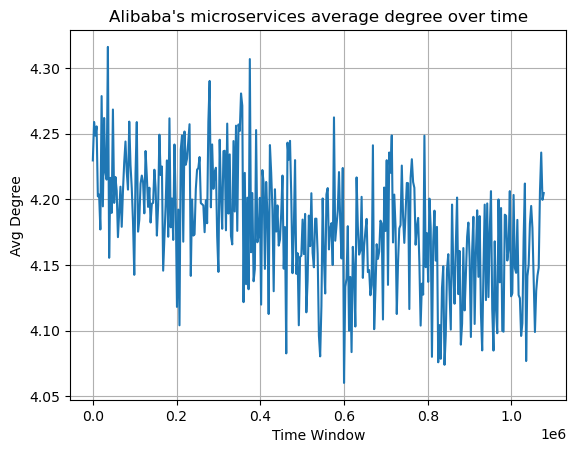

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

avg_degree = []
time = []

for windowed_graph in g.rolling(window=3000):
    result = rp.average_degree(windowed_graph)
    avg_degree.append(result)
    time.append(windowed_graph.earliest_time)

plt.plot(time, avg_degree)
plt.xlabel("Time Window")
plt.ylabel("Avg Degree")
plt.title("Alibaba's microservices average degree over time")
plt.grid(True)

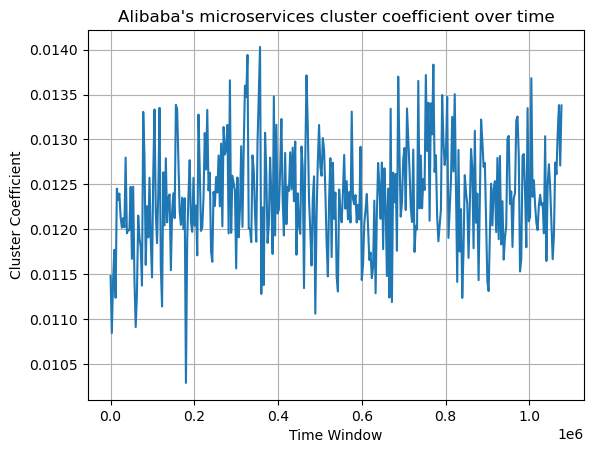

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

clstr_cfsnt = []
time = []

for windowed_graph in g.rolling(window=3000):
    result = rp.global_clustering_coefficient(windowed_graph)
    clstr_cfsnt.append(result)
    time.append(windowed_graph.earliest_time)

plt.plot(time, clstr_cfsnt)
plt.xlabel("Time Window")
plt.ylabel("Cluster Coefficient")
plt.title("Alibaba's microservices cluster coefficient over time")
plt.grid(True)

In [21]:
print(len(g.vertices.at(1000))

SyntaxError: unexpected EOF while parsing (1554400487.py, line 1)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

clstr_cfsnt = []
time = []

for windowed_graph in g.rolling(window=3000):
    result = rp.global_clustering_coefficient(windowed_graph)
    clstr_cfsnt.append(result)
    time.append(windowed_graph.earliest_time)

plt.plot(time, clstr_cfsnt)
plt.xlabel("Time Window")
plt.ylabel("Cluster Coefficient")
plt.title("Alibaba's microservices cluster coefficient over time")
plt.grid(True)

In [17]:
from raphtory import algorithms as rp

print(rp.max_degree(g))

4411


In [ ]:
results = rp.pagerank(g)

top_5 = results.top_k(5)
for rank, (name,score) in enumerate(top_5, 1):
    print(f"Rank {rank}: {name} with a score of {score:.5f}")

In [ ]:
import os

# Save the file
absolute_save_path = os.path.abspath("saved_graph")
g.save_to_file(absolute_save_path)

# Load the file
if os.path.isfile(absolute_save_path):
    loaded_graph = Graph.load_from_file(absolute_save_path)
    print(loaded_graph)
else:
    print(f"File does not exist: {absolute_save_path}")

In [ ]:
import os
print("Current Working Directory:", os.getcwd())

In [ ]:
print(call_graph_df.dtypes)
print(call_graph_df.isnull().sum())
print(call_graph_df.isin([np.inf, -np.inf]).sum())

In [22]:
print(g1)

Graph(number_of_edges=51364, number_of_vertices=16666, number_of_temporal_edges=10395251, earliest_time="180000", latest_time="359999")


In [ ]:
import raphtory.export as ex
import json

pyvis_g = ex.to_pyvis(
    traffic_graph, edge_weight="data_size_MB", edge_color="#8e9b9e", directed=True
)

options = {
    "edges": {
        "scaling": {
            "min": 1,
            "max": 10,
        },
    },
    "physics": {
        "barnesHut": {
            "gravitationalConstant": -30000,
            "centralGravity": 0.3,
            "springLength": 100,
            "springConstant": 0.05,
        },
        "maxVelocity": 50,
        "timestep": 0.5,
    },
}

pyvis_g.set_options(json.dumps(options))

pyvis_g.show("nx.html")